In [180]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from geopy import distance
from scipy.stats import gaussian_kde
%store -r trips
%store -r stations

## Visualisering med søylediagram

I seksjonen *Tabellfunksjoner* så vi at vi kunne gruppere en tabell etter en bestemt kolonne, og deretter finne gjennomsnittlige verdier. På denne måten kan vi for eksempel finne gjennomsnittlig varighet for sykkelturer, gruppert etter ukedag:

In [181]:
grouped = trips.groupby("day_of_week")
means_sec = grouped["duration"].mean()
means = means_sec/60
print(means)

day_of_week
friday       14.638859
monday       13.299420
saturday     16.658971
sunday       17.167381
thursday     14.034353
tuesday      13.239689
wednesday    13.588347
Name: duration, dtype: float64


Merk at vi har delt resultatet på 60 for å få svaret i antall minutter. En gjennomsnittlig fredagstur varte omtrent 14.64 minutter, som tilsvarer 14 minutter og 38 sekunder (fordi 64% av ett minutt er 38 sekunder). 

Nå ønsker vi å visualisere disse tallene som et søylediagram. I første omgang er det lurt å sortere verdiene i ønsket rekkefølge. 

Indeksene er *friday*, *monday*, *saturday* og så videre. Vi oppretter en liste med alle indeksene i den rekkefølgen vi ønsker:

In [182]:
weekdays = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

Nå kan vi bruke skrivemåten `means[weekdays]` for å endre rekkefølgen:

In [183]:
means = means[weekdays]
print(means)

day_of_week
monday       13.299420
tuesday      13.239689
wednesday    13.588347
thursday     14.034353
friday       14.638859
saturday     16.658971
sunday       17.167381
Name: duration, dtype: float64


Variabelen `means` inneholder en kolonne med tallverdier, og på denne kan vi bruke funksjonen `plot`:

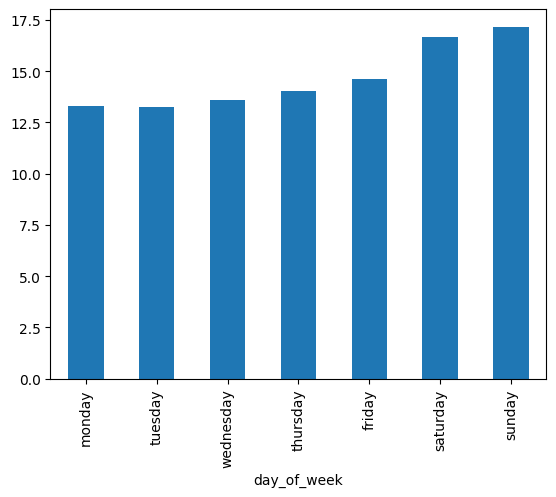

In [184]:
means.plot(kind='bar')
plt.show()

Merk at vi tegner søylene i et *plott*, det vil si et koordinatsystem med en $x$ -og $y$-akse. Det er Python-pakken [*matplotlib.pyplot*](https://matplotlib.org/3.5.3/index.html) som brukes, og vi har importert pakken under navnet `plt`. 

Vi kan bruke `plt` til å markere gjennomsnittlig varighet av alle turer som en striplet linje i koordinatsystemet:

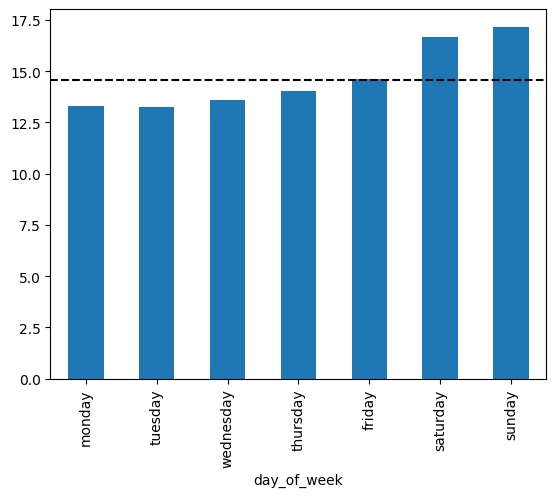

In [185]:
means.plot(kind='bar')

m = trips["duration"].mean()/60
plt.axhline(y=m, linestyle='--', color='black')

plt.show()

I dette diagrammet er det lett å se at den gjennomsnittlige varigheten til sykkelturer øker når vi kommer nærmere helgen.

Vi kan også lage mer komplekse grupper som vi kan sammenligne. For eksempel lagde vi tidligere en kolonne som forteller hvilken periode på dagen turene skjedde (se løsningsforslag i seksjonen *Kolonnefunksjoner*): 

In [186]:
print(trips["part_of_day"])

0           night
1           night
2           night
3           night
4           night
           ...   
131376    evening
131377    evening
131378    evening
131379    evening
131380    evening
Name: part_of_day, Length: 131381, dtype: object


Vi kan nå gruppere tabellen etter kolonnene *day_of_week* og *part_of_day*: 

In [187]:
grouped = trips.groupby(["day_of_week", "part_of_day"])
means = grouped["duration"].mean()
means = means.unstack()
means = means/60
print(means)

part_of_day  afternoon    evening    morning      night
day_of_week                                            
friday       15.189377  14.132662  14.957210   9.524581
monday       13.319349  13.749092  14.062873   9.621954
saturday     17.156382  15.041252  17.300547  11.460043
sunday       17.874148  15.005889  18.243728   9.340621
thursday     14.288915  13.600807  14.872700   9.318157
tuesday      13.564925  13.161409  13.801724   9.206462
wednesday    13.732902  13.437937  14.403294   9.688066


Forklaring:

- Operasjonen `means.unstack()` gjør kolonnen om til en tabell, der det er lettere å lese verdiene til de ulike gruppene.
- Vi har igjen delt på 60 for å få verdiene i minutter i stedet for sekunder.

I tabellen ser vi for eksempel at sykkelturer som skjer på en søndag morgen har gjennomsnittlig varighet 15 minutter, mens på tirsdag natt er det i overkant av 9 minutter. 

Nå gjenstår det å sortere verdiene i ønsket rekkefølge. Da må vi skille mellom sortering av rader og kolonner:

In [188]:
parts_of_day = ["morning", "afternoon", "evening", "night"]
weekdays = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]

means = means[parts_of_day]
means = means.loc[weekdays]

print(means)

part_of_day    morning  afternoon    evening      night
day_of_week                                            
monday       14.062873  13.319349  13.749092   9.621954
tuesday      13.801724  13.564925  13.161409   9.206462
wednesday    14.403294  13.732902  13.437937   9.688066
thursday     14.872700  14.288915  13.600807   9.318157
friday       14.957210  15.189377  14.132662   9.524581
saturday     17.300547  17.156382  15.041252  11.460043
sunday       18.243728  17.874148  15.005889   9.340621


For å sortere radene, må vi altså bruke kommandoen `loc`.

Nå kan vi opprette søylediagrammet på akkurat samme måte som tidligere. Merk at denne gangen inneholder `means` en tabell, men vi kan fortsatt bruke funksjonen `plot`: 

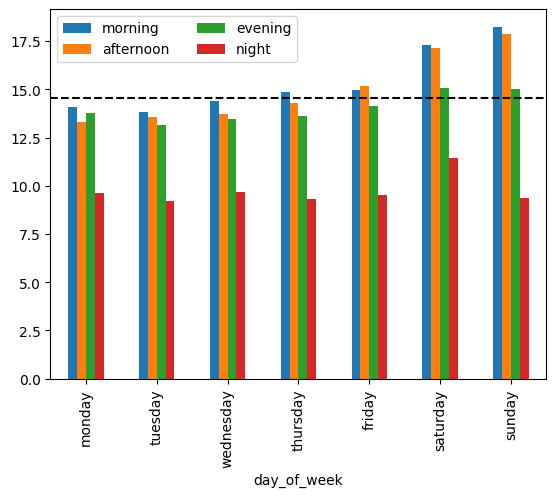

In [189]:
means.plot(kind='bar')

m = trips["duration"].mean()/60
plt.axhline(y=m, linestyle='--', color='black')

plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.show()

Fra dette søylediagrammet kan vi hente mer spesifikk informasjon. For eksempel ser vi at økningen som skjer i helgen hovedsakelig skyldes sykkelturer som starter på morgen og ettermiddag.

**Oppsummering.** I denne seksjonen har vi sett hvordan vi kan bruke søylediagram til å sammenligne ulike grupper i dataene. Vi gjør følgende tre steg for å oppnå dette:

1. Vi bruker funksjonen `groupby` på tabellen for å opprette en gruppering.
2. Vi bruker funksjonen `mean` på en av kolonnene i den grupperte tabellen. Resultatet er en kolonne som inneholder gjennomsnittet til hver gruppe. 
3. Vi bruker `plot(kind='bar')` på kolonnen vi fikk i forrige steg. Da opprettes et søylediagram, der hver gruppe får en søyle.

Etter steg 2 kan det være aktuelt å gjøre noen mellomsteg:
* Dersom vi har gruppert etter to kolonner, bør vi konvertere resultatet til en tabell med funksjonen `unstack`.
* Vi kan endre rekkefølgen på gruppene slik at søylediagrammet blir mer oversiktlig.

**Aktivitetsforslag 1.** Grupper turtabellen etter ukedag og periode på dagen, og lag et søylediagram som viser gjennomsnittlig avstand mellom start -og sluttstasjon. 

**Aktivitetsforslag 2.** 

Forberedelse: 

1. Velg deg et punkt i Oslo, og opprett en kolonne i turtabellen som forteller hvor nærme turene endte dette punktet (se seksjonen *Tabellfunksjoner* for hjelp).
2. Del inn turtabellen i grupper etter eget ønske (for eksempel ukedag eller periode på dagen). 

Oppgaver: 

1. Hvor nærme ender sykkelturene i gjennomsnitt ditt valgte punkt?
2. Hvilken gruppe av sykkelturer ender i gjennomsnitt nærmest og lengst unna ditt valgte punkt?
3. Sammenlign de ulike gruppene ved å lage et søylediagram.
4. Hva tror du forskjellen mellom gruppene skyldes?

## Visualisere fordelinger

**Kakediagram.** Vi har tidligere sett hvor enkelt det er å finne ut hvordan sykkelturene fordeler seg på ukedagene: 

In [190]:
counts = trips["day_of_week"].value_counts()
counts = counts[weekdays]

print(counts)

day_of_week
monday       21259
tuesday      18696
wednesday    19305
thursday     18998
friday       19367
saturday     19005
sunday       14751
Name: count, dtype: int64


Hva om vi nå ønsker å visualisere dette med et kakediagram? Med `plt` kan vi enkelt få til dette med funksjonen `pie`:

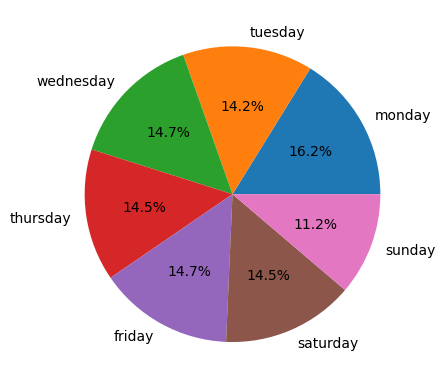

In [191]:
plt.pie(counts, labels = counts.index, autopct = '%1.1f%%')
plt.show()

Forklaring: 

* Som første parameter gir vi kolonnen som inneholder antall sykkelturer på de ulike dagene.
* I parameteren `labels` gir vi navnet på hver gruppe. I vårt tilfelle henter vi indeksene til kolonnen, som allerede gir oss passende navn.
* Parameteren `autopct = '%1.1f%%'` forteller at andelene skal angis i prosent med én desimal.

På samme måte kan vi visualisere hvilke perioder på dagen som er mest populære: 

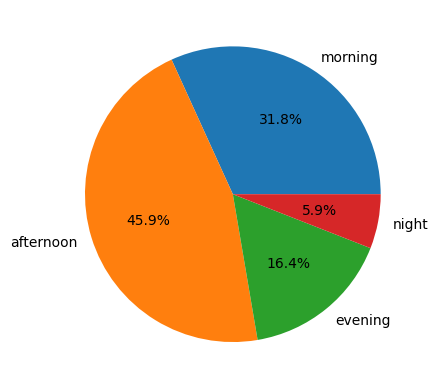

In [192]:
counts  = trips["part_of_day"].value_counts()

parts_of_day = ["morning", "afternoon", "evening", "night"]
counts = counts[parts_of_day]

plt.pie(counts, labels = counts.index, autopct = '%1.1f%%')
plt.show()

Her ser vi at ettermiddag og morgen er de mest populære periodene på dagen. Men hva om vi ønsker et kakediagram for hverdagsturer, og et kakediagram for helgesturer, slik at vi kan sammenligne gruppene? 

Vi ønsker altså at turtabellen skal deles inn i to grupper; helg og hverdag. Da må vi gruppere etter `part_of_week`:

In [193]:
grouped = trips.groupby("part_of_week")

counts  = grouped["part_of_day"].value_counts()
counts = counts.unstack()

parts_of_day = ["morning", "afternoon", "evening", "night"]
counts = counts[parts_of_day]

print(counts)

part_of_day   morning  afternoon  evening  night
part_of_week                                    
weekday         31450      44674    14369   7132
weekend         10330      15606     7140    680


Merk at vi har brukt funksjonen `unstack` for å gjøre kolonnen `counts` om til en tabell, samt at vi har sortert kolonnene. 

Vi ønsker nå å visualisere fordelingene til hverdag og helg hver for seg. Da må vi hente ut radene i tabellen - husk at funksjonen `loc` brukes for å hente ut en rad:

In [194]:
weekday_counts = counts.loc["weekday"]
weekend_counts = counts.loc["weekend"]

print(weekday_counts)
print()
print(weekend_counts)

part_of_day
morning      31450
afternoon    44674
evening      14369
night         7132
Name: weekday, dtype: int64

part_of_day
morning      10330
afternoon    15606
evening       7140
night          680
Name: weekend, dtype: int64


Nå er vi klare til å visualisere fordelingene hver for seg. Vi begynner med hverdager:

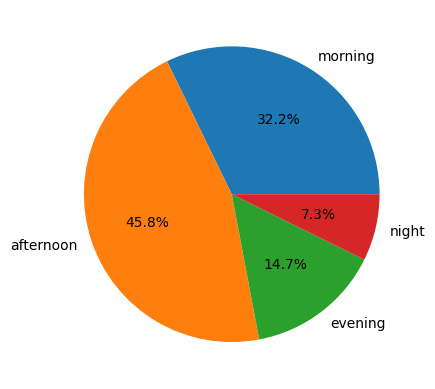

In [195]:
plt.pie(weekday_counts, labels = weekday_counts.index, autopct = '%1.1f%%')
plt.show()

Deretter viser vi fordelingen for helger:

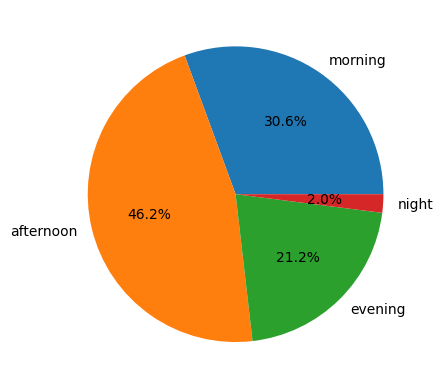

In [196]:
plt.pie(weekend_counts, labels = weekend_counts.index, autopct = '%1.1f%%')
plt.show()

Hvilke forskjeller kan du se mellom turer som startet på hverdag og helg? 

**Flere diagrammer med løkke.** I slutten av forrige seksjon la du kanskje merke til at vi gjorde nesten akkurat det samme to ganger? For å opprette flere diagrammer i ett og samme program, kan vi bruke følgende løkke:

In [197]:
for i in range(2):
    plt.plot(0,0, "o")
    filename = f"{i}.pdf"
    plt.savefig(filename)
    plt.close()

Med koden over oppretter vi to diagrammer, og lagrer dem som filer med navnene *0.pdf* og *1.pdf*. Merk at når vi er ferdige med én figur og har lagret den, må vi bruke `plt.close()` før vi kan starte på neste figur.

Vi ønsker altså å opprette et diagram for hver av radene i følgende tabell:

In [198]:
print(counts)

part_of_day   morning  afternoon  evening  night
part_of_week                                    
weekday         31450      44674    14369   7132
weekend         10330      15606     7140    680


Husk at vi brukte kommandoen `counts.loc["weekday"]` for å hente den første raden. I stedet for å skrive indeksene *weekday* og *weekend* manuelt, kan de hentes fra variabelen `counts`: 

In [199]:
indices = counts.index
for i in indices:
    print(i)

weekday
weekend


Nå kan vi opprette et kakediagram for hver av radene:

In [200]:
for i in indices:
    c = counts.loc[i]
    plt.pie(c, labels = c.index, autopct = '%1.1f%%')
    filename = f"piechart-{i}.pdf"
    plt.savefig(filename)
    plt.close()

Ved kjøring av denne koden opprettes to filer (*piechart-weekday.pdf* og *piechart-weekend.pdf*) med de ønskede kakediagrammene.

**Søylediagram.** Hva om vi ønsker mer detaljer om når på dagen turene skjer? Vi har sett at omtrent 32% av turer skjer på morgenen, altså mellom 6 og 11, men hvilke klokketimer er mest populære?

Dersom vi ønsker å vite fordelingen av turer på klokketimer, så trenger vi 24 kategorier. Det blir for mye å vise så mange segmenter i et kakediagram, så i dette tilfellet er det fornuftig med et søylediagram i stedet!

Men først må vi opprette en kolonne i turtabellen som inneholder nøyaktig den informasjonen vi ønsker å bruke. I første omgang trenger vi en funksjon som konverterer en datostreng til klokketime: 

In [201]:
def get_hour(date_string):
    date_object = datetime.fromisoformat(date_string)
    return date_object.hour

test = get_hour("2023-07-01 10:27:10")
print(test)

10


Nå kan vi konvertere hele kolonnen *started_at*, og plassere resultatet i en ny kolonne:

In [202]:
trips["hour"] = trips["started_at"].apply(get_hour)
print(trips["hour"])

0          1
1          3
2          3
3          3
4          3
          ..
131376    22
131377    22
131378    22
131379    23
131380    23
Name: hour, Length: 131381, dtype: int64


Det neste steget er å telle antall forekomster for hver klokketime: 

In [225]:
counts = trips["hour"].value_counts()
counts = counts.sort_index()
print(counts)

hour
0         3
1         2
2         1
3       584
4      1917
5      5305
6      7680
7      5575
8      5763
9      6989
10     7767
11     8006
12     8643
13    10734
14    11649
15    11219
16    10066
17     7969
18     6353
19     5385
20     4353
21     3391
22     2022
23        5
Name: count, dtype: int64


Merk at vi her har brukt kolonnefunksjonen `sort_index` for å sortere klokketimene i stigende rekkefølge. 

Nå kan vi opprette et søylediagram som viser antall forekomster for hver klokketime:

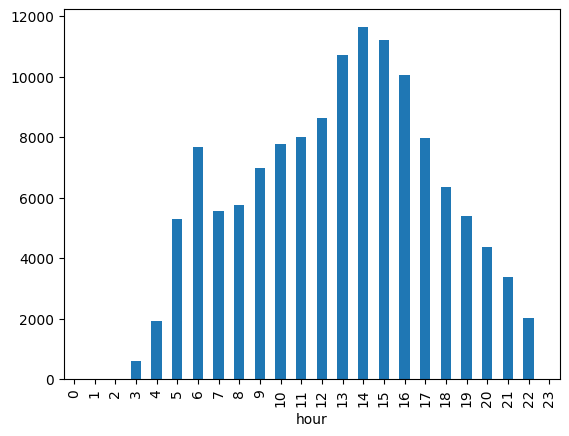

In [204]:
counts.plot(kind='bar')
plt.show()

Her ser vi for eksempel at klokketimen 6 (altså mellom 6:00 og 6:59) er spesielt populær. Vi har altså fått med flere detaljer i fordelingen enn vi kunne med et kakediagram.

**Oppsummering.** I denne seksjonen har vi visualisert hvordan sykkelturene fordeler seg på ulike kategorier. Dersom vi har få kategorier kan vi bruke et kakediagram, mens ved mange kategorier kan vi bruke et søylediagram.

Vi har også sett hvordan vi kan gruppere sykkelturene, og visualisere fordelingen til hver av grupppene. Dette kan gjøres effektivt dersom vi bruker en løkke til å opprette flere diagrammer.

**Aktivitetsforslag 1.** Grupper sykkelturene i hverdag og helg. Opprett et søylediagram for hver av gruppene, som viser hvordan sykkelturene fordeler seg på klokketimer. Hvilke forskjeller kan du finne mellom de to diagrammene? Hva tror du er årsaken til forskjellene? 

**Aktivitetsforslag 2.** Opprett to tabeller; den ene tabellen skal inneholde alle turer som varte kortere enn én time (3600), og den andre tabellen skal inneholde alle turer som varte én time eller lengre. 

1. Bruk kakediagrammer til å vise hvordan korte og lange turer fordeler seg på ukedagene. Hvilke forskjeller finner du? Hva tror du årsaken er?
2. Bruk søylediagrammer til å vise hvordan korte og lange turer fordeler seg på kloketimer. Kommenter resultatet.

## Tillegg: Statistisk visualisering av fordelinger

I forrige seksjon så vi på følgende søylediagram:

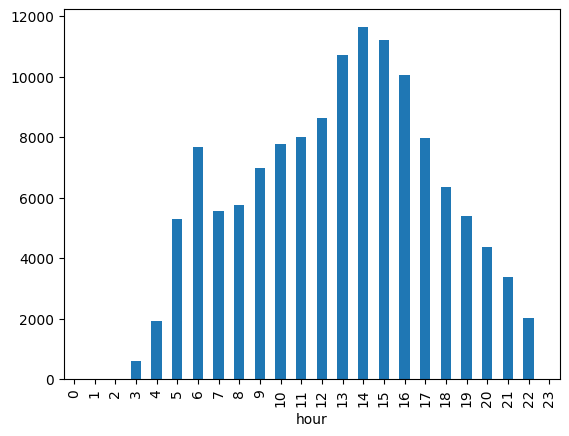

In [205]:
counts.plot(kind='bar')
plt.show()

Diagrammet viser antall turer på hver klokketime, og gir en veldig god oversikt over hvordan sykkelturene fordeler seg med tanke på klokkeslett.

Hva om vi ønsker en tilsvarende oversikt med tanke på avstand (mellom start -og sluttpunkt)? Foreløpig har vi følgende informasjon:

In [206]:
distances = trips["distance"]
print(distances.mean())
print(distances.min())
print(distances.max())

1.5637046147163225
0.0
8.17033235134136


Vi kjenner altså gjennomsnittlig, minste og største avstand, men vi har veldig lite detaljer. Et søylediagram som viser hvilke avstander som forekommer mest ville gitt oss mye mer informasjon!

Husk at hver søyle må representere en gruppe, så for eksempel kunne den første gruppen være turer mellom 0 og 0.49 km, den andre gruppen mellom 0.50 og 1.00 km, og så videre. Heldigvis trenger vi ikke å opprette disse gruppene selv - det finnes nemlig en Python-pakke som kan lage diagrammet for oss! 

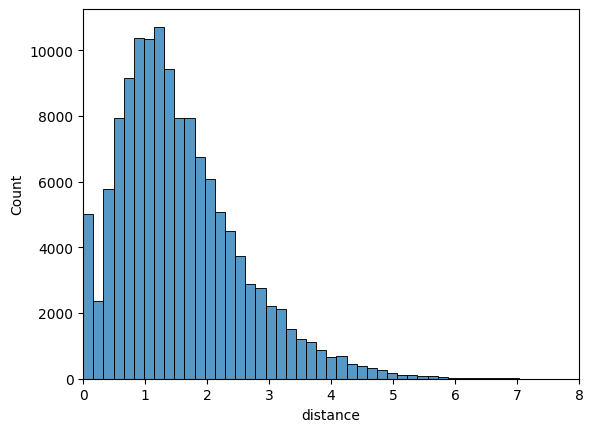

In [207]:
import seaborn as sns

sns.histplot(distances, bins=50)
plt.xlim(0, 8)
plt.show()

Dette diagrammet kalles et *histogram*, og skiller seg fra et søylediagram ved at gruppene er små intervaller på tallinja.  Vi har brukt [*seaborn*](https://seaborn.pydata.org/), som er en Python-pakke for statistiske datavisualiseringer. Med funksjonen `histplot` kan vi lage det ønskede histogrammet:

- Som første parameter bruker vi kolonnen med avstander. Merk at denne kolonnen er hentet fra turtabellen og har derfor over 130.000 verdier!
- Med parameteren `bins` definerer vi antall søyler.

I histogrammet ser vi at mange turer ligger rundt 1.2 km, og ettersom avstanden øker, blir det gradvis færre turer. Merk deg den høye toppen som inkluderer turer med avstand nær null. Dette kan skyldes at mange turer starter og slutter på samme stasjon - for eksempel er det naturlig å tenke at mange bruker bysykkel for å handle dagligvarer, altså frem -og tilbaketurer. 

Du legger kanskje merke til at toppen av søylene ser ut til å danne en graf? En *KDE*-graf (*kernel density estimate*) er en utjevnet versjon av histogrammet, som gir en penere måte å visualisere hvordan sykkelturene fordeler seg med tanke på avstand:

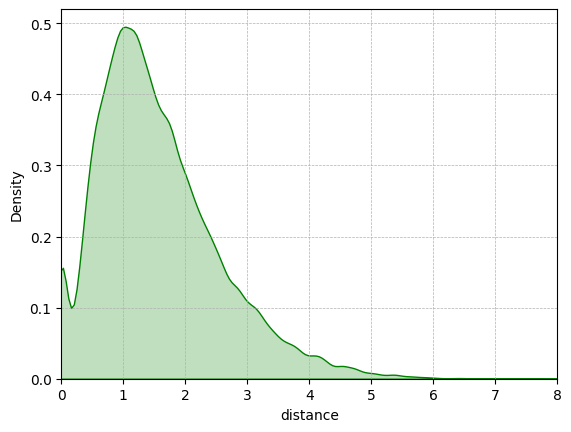

In [208]:
sns.kdeplot(distances, color="green", fill=True)
plt.xlim(0, 8)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Med denne grafen får vi et overblikk over hvilke avstander som er mest forekommende. Vi trenger ikke å forstå nøyaktig hva tallene på $y$-aksen betyr, men dersom vi integrerer hele grafen, blir svaret 1. Det betyr at arealet mellom to punkter kan gi oss nyttig informasjon.

Hvis for eksempel arealet under grafen mellom 1 og 2 km er 0.5, så betyr det at 50% av sykkelturene befinner seg i dette intervallet.

For å få enda mer ut av grafen, skal vi nå legge til ekstra informasjon. Du trenger ikke å forstå funksjonen under, men du kan kopiere den inn i ditt eget program:

In [235]:
from scipy.stats import gaussian_kde

def kdeplot_with_info(values, central = 90, ax = None, unit = "", color = "green"):
    if ax is None:
        ax = plt.gca()

    d = (100-central)/2.0
    ps = np.percentile(values, d)
    pe = np.percentile(values, 100-d)
    mean = values.mean()
    median = values.median()
        
    kde = gaussian_kde(values)
    kde_mean = kde.evaluate(mean)[0]
    kde_median = kde.evaluate(median)[0]
        
    area90_label = f"Central {central}%: {ps:.2f} - {pe:.2f} {unit}"
    mean_label = f"Mean: {mean:.2f} {unit}"
    median_label = f"Median: {median:.2f} {unit}"

    sns.kdeplot(values, ax=ax, color="grey", fill=True)
    sns.kdeplot(values, ax=ax, color=color, fill=True, label=area90_label, clip=(ps, pe))
    ax.plot([mean, mean], [0, kde_mean], color=color, label=mean_label)
    ax.plot([median, median], [0, kde_median], color=color,  linestyle="--", label=median_label)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()
    
    return

Her har vi definert funksjonen `kdeplot_with_info`, og vi kan for eksempel bruke den på avstandskolonnen:

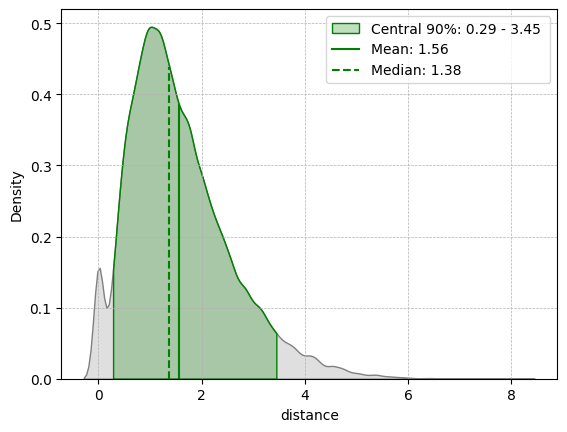

In [228]:
kdeplot_with_info(distances)
plt.show()

Her har vi fått med gjennomsnitt -og medianverdi i diagrammet. Medianverdien deler grafen opp i to deler med like stort areal. Sagt på en annen måte; det er like mange sykkelturer til venstre og høyre for medianverdien. 

Hvorfor er gjennomsnittet og medianen forskjellig? Tenk deg at vi har registrert tre turer med avstander 1 km, 2 km og 6 km. Da er medianen (den "midterste" verdien) lik 2 km, men gjennomsnittet er 3 km! Det er fordi den lengste turen trekker gjennomsnittet opp!

Det grønne området markerer 90% av arealet, på en slik måte at det er like mye areal på hver side. Derfor kalles det grønne området for *central 90%*. I vår graf er dette området mellom 0.29 km og 3.45 km. Fra dette kan vi gjøre følgende konklusjoner:

* De 5 % korteste turene var 0 - 0.29 km.
* De 5 % lengste turene var 3.45 km og lengre.
* De 90 % "midterste" turene var mellom 0.29 og 3.45 km.

Ved å bruke tilleggsparameteren `central`, kan vi bestemme hvor stort det sentrale området skal være:

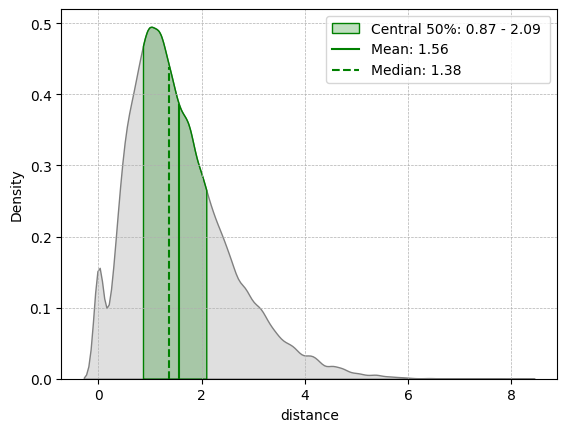

In [211]:
kdeplot_with_info(distances, central=50)
plt.show()

Her ser vi at 50 % av turene faller omtrent innenfor 1-2 km.

I starten av seksjonen viste vi hvordan sykkelturene er fordelt på klokketimer. Vi kan også vise dette som en *KDE*-graf. Men da må klokkeslettene konverteres til desimaltall på intervallet 0-24. For eksempel, hvis en tur startet på tidspunktet *13:30:00*, så skal dette konverteres til 13.5.

Først oppretter vi en funksjon som kan konvertere datostrenger til desimaltall:

In [212]:
def get_time_as_decimal(date_string):
    date_object = datetime.fromisoformat(date_string)
    return date_object.hour + date_object.minute/60 + date_object.second/3600

test = get_time_as_decimal("2023-07-01 10:27:10")
print(test)

10.452777777777778


Nå kan vi opprette en ny kolonne i turtabellen som inneholder starttidspunktet som desimaltall:

In [229]:
trips["started_at_as_decimal"] = trips["started_at"].apply(get_hour_as_fraction)
print(trips["started_at_as_decimal"])

0          1.377222
1          3.045278
2          3.224444
3          3.255000
4          3.368611
            ...    
131376    22.941111
131377    22.963333
131378    22.985278
131379    23.365556
131380    23.365556
Name: started_at_as_decimal, Length: 131381, dtype: float64


Nå som vi har en kolonne med desimaltall, kan vi bruke den til å opprette en *KDE*-graf:

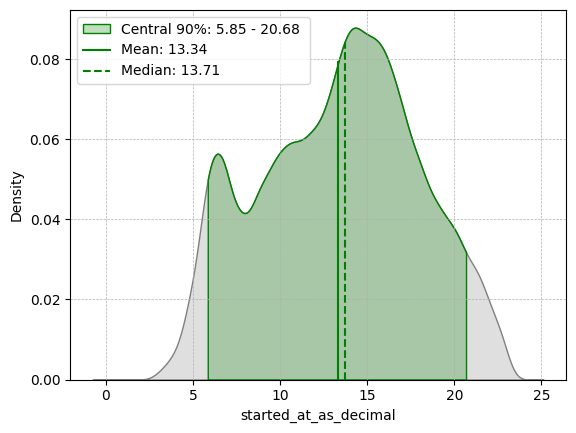

In [230]:
kdeplot_with_info(trips["started_at_as_decimal"])

Mediantidspunktet for en sykkeltur er 13.71, som svarer til klokkeslettet 13:43 (fordi 71% av en time er 43 minutter). Videre ser vi at 90% av sykkelturer skjer mellom 5.85 og 20.68 (hvilke klokkelsett svarer dette til?). 

Grafen har et tydelig toppunkt rundt kl. 7, som antagelig kan forklares med at folk drar på jobb rundt dette tidspunktet. Men hva om vi sammenligner hverdag og helg?

Her er det fornuftig å opprette to tabeller; én med alle hverdagsturer og én med alle helgesturer: 

In [215]:
weekday = trips[trips["part_of_week"]=="weekday"]
weekend = trips[trips["part_of_week"]=="weekend"]
tables = [weekday, weekend]
labels = ["weekday", "weekend"]

I forrige seksjon så vi hvordan vi kan bruke en løkke til å lage flere diagrammer samtidig:

In [231]:
for i in range(2):
    table = tables[i]
    label = labels[i]

    kdeplot_with_info(table["started_at_as_decimal"])
    filename = f"kde-{label}.pdf"
    plt.savefig(filename)
    plt.close()

Med denne koden har vi opprettet to filer: 

* *kde-weekday.pdf* 

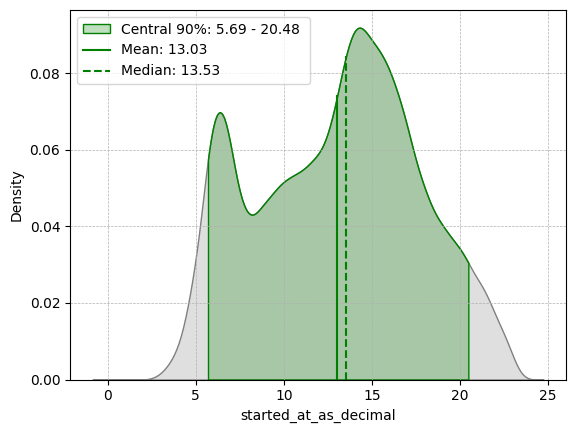

In [233]:
table = tables[0]
label = labels[0]

kdeplot_with_info(table["started_at_as_decimal"])

* *kde-weekend.pdf*

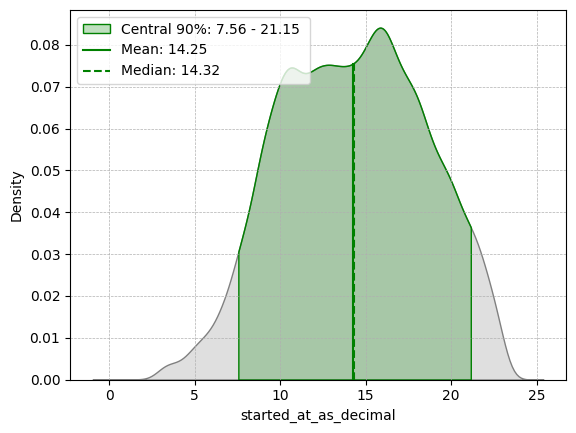

In [234]:
table = tables[1]
label = labels[1]

kdeplot_with_info(table["started_at_as_decimal"])

Her kan vi se at toppunktet kl. 7 har blitt veldig tydelig på hverdager, mens i helger finner vi ikke et tilsvarende toppunkt!

**Oppsummering.** I forrige seksjon viste vi hvordan sykkelturene fordelte seg på bestemte kategorier, mens i denne seksjonen har vi vist hvordan sykkelturene fordeler seg på tallverdier, slik som varighet og avstand. Vi har brukt både histogram og *KDE*-grafer, som er statistiske metoder for å visualisere data. 

**Aktivitetsforslag.** For hver av de følgende gruppene, vis hvordan sykkelturene fordeler seg utover en dag ved å bruke en *KDE*-graf:

1a. Turer kortere enn én time (3600 sekunder)   
1b. Turer på én time eller lengre   
2a. Turer som startet og sluttet på samme stasjon   
2b. Turer som var kortere enn 1 km   
2c. Turer som var lengre enn 3 km   


Sammenlign grafene 1a-1b og 2a-2c. Hvilke forskjeller finner du? Hva tror du er årsaken til forskjellene?

## Ekstra funksjon

In [227]:
from scipy.stats import gaussian_kde

def kdeplot_with_info(values, central = 90, ax = None, unit = "", color = "green"):
    if ax is None:
        ax = plt.gca()

    d = (100-central)/2.0
    ps = np.percentile(values, d)
    pe = np.percentile(values, 100-d)
    mean = values.mean()
    median = values.median()
        
    kde = gaussian_kde(values)
    kde_mean = kde.evaluate(mean)[0]
    kde_median = kde.evaluate(median)[0]
        
    area90_label = f"Central {central}%: {ps:.2f} - {pe:.2f} {unit}"
    mean_label = f"Mean: {mean:.2f} {unit}"
    median_label = f"Median: {median:.2f} {unit}"

    sns.kdeplot(values, ax=ax, color="grey", fill=True)
    sns.kdeplot(values, ax=ax, color=color, fill=True, label=area90_label, clip=(ps, pe))
    ax.plot([mean, mean], [0, kde_mean], color=color, label=mean_label)
    ax.plot([median, median], [0, kde_median], color=color,  linestyle="--", label=median_label)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

    xmax = np.percentile(values, 99)
    ymax = ax.get_ylim()[1]
    
    return xmax, ymax

In [217]:
from matplotlib.gridspec import GridSpec

def kdeplots(df, column, unit="", color="green"):
    df_type = type(df)
    if df_type is pd.core.frame.DataFrame:
        l = 0
        c = 1
        r = 1
    elif df_type is pd.core.groupby.generic.DataFrameGroupBy:
        info = df.grouper.levels
        l = len(info)
        r = len(info[0])
        if l == 1:
            c = 1
        elif l == 2:
            c = len(info[1]) 
        else:
            raise ValueError("Cannot use DataFrame grouped by more than two columns")

    def create_figure(r, c, h=4, w=8, top=0.1):
        fig = plt.figure(figsize=(w*c, h*r + top))
        gs = GridSpec(r+1, c, figure=fig, hspace=0.3, height_ratios = [top] + [h]*r)
        axs = np.array([[fig.add_subplot(gs[i+1, j]) for j in range(c)] for i in range(r)])
        return fig, axs
        
    fig, axs = create_figure(r, c)
    axs1d = axs.ravel()
      
    def get_dataframe(d0, d1):
        if l==0:
            return df, ""
        elif l==1:
            index = info[0][d0]
            new_df = df.get_group(index)
            title = index
            return new_df, title
        else:
            index1 = info[0][d0]
            index2 = info[1][d1]
            index = (info[0][d0], info[1][d1])
            new_df = df.get_group(index)
            title = f"{index1}, {index2}"
            return new_df, title
    
    xmax = 0
    ymax = 0
    for d0 in range(r):
        for d1 in range(c):
            ax = axs[d0, d1]
            new_df, title = get_dataframe(d0, d1)
            values = new_df[column]
            n = values.size
            if n > 1:
                x, y = kdeplot_with_info(values, ax=ax, unit=unit, color=color)
                xmax = max(xmax, x)
                ymax = max(ymax, y) 
                ax.set_title(title)
            else: 
                fig.delaxes(ax)

    for ax in axs1d:
        ax.set_xlim(0, xmax)
        ax.set_ylim(0, ymax)
        ax.set_xlabel("")

    for ax in axs1d[1:]:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    title_space = 0.5
    top = 1.0 - title_space / fig.get_figheight()
    plt.subplots_adjust(top=top)
    
    def present(s):
        return s.replace("_", " ").capitalize()

    title = f"Distribution of {present(column)}"
    fig.suptitle(title, fontsize=16)

    return fig, axs1d

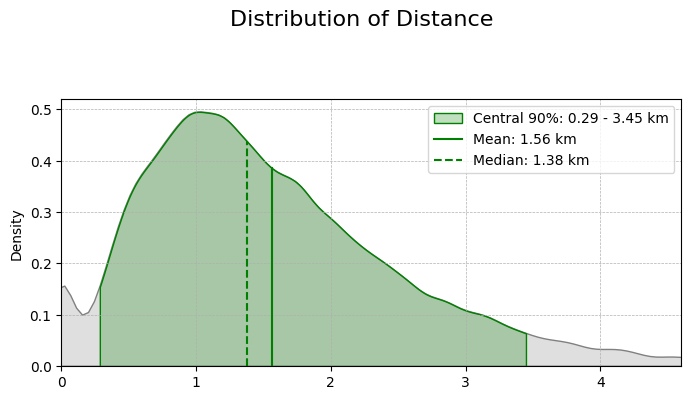

In [218]:
kdeplots(trips, "distance", unit="km")
plt.show()

In [219]:
def get_hour_as_fraction(date_string):
    date_object = datetime.fromisoformat(date_string)
    return date_object.hour + date_object.minute/60 + date_object.second/3600

test = get_hour_as_fraction("2023-07-01 10:27:10")
print(test)

10.452777777777778


In [220]:
trips["hour_as_fraction"] = trips["started_at"].apply(get_hour_as_fraction)

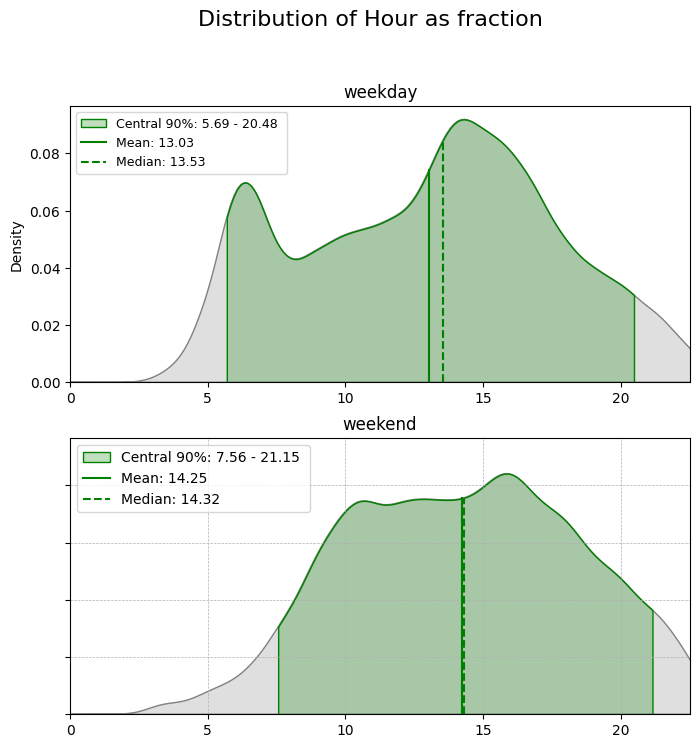

In [221]:
grouped = trips.groupby("part_of_week")

fig, axs = kdeplots(grouped, "hour_as_fraction")
axs[0].legend(loc="upper left", fontsize=9)
plt.show()

In [222]:
trips["duration_in_minutes"] = trips["duration"]/60
print(trips["duration_in_minutes"])

0         17.416667
1         11.016667
2         11.966667
3         17.600000
4          3.550000
            ...    
131376     3.083333
131377    16.600000
131378    12.850000
131379    39.116667
131380     2.250000
Name: duration_in_minutes, Length: 131381, dtype: float64


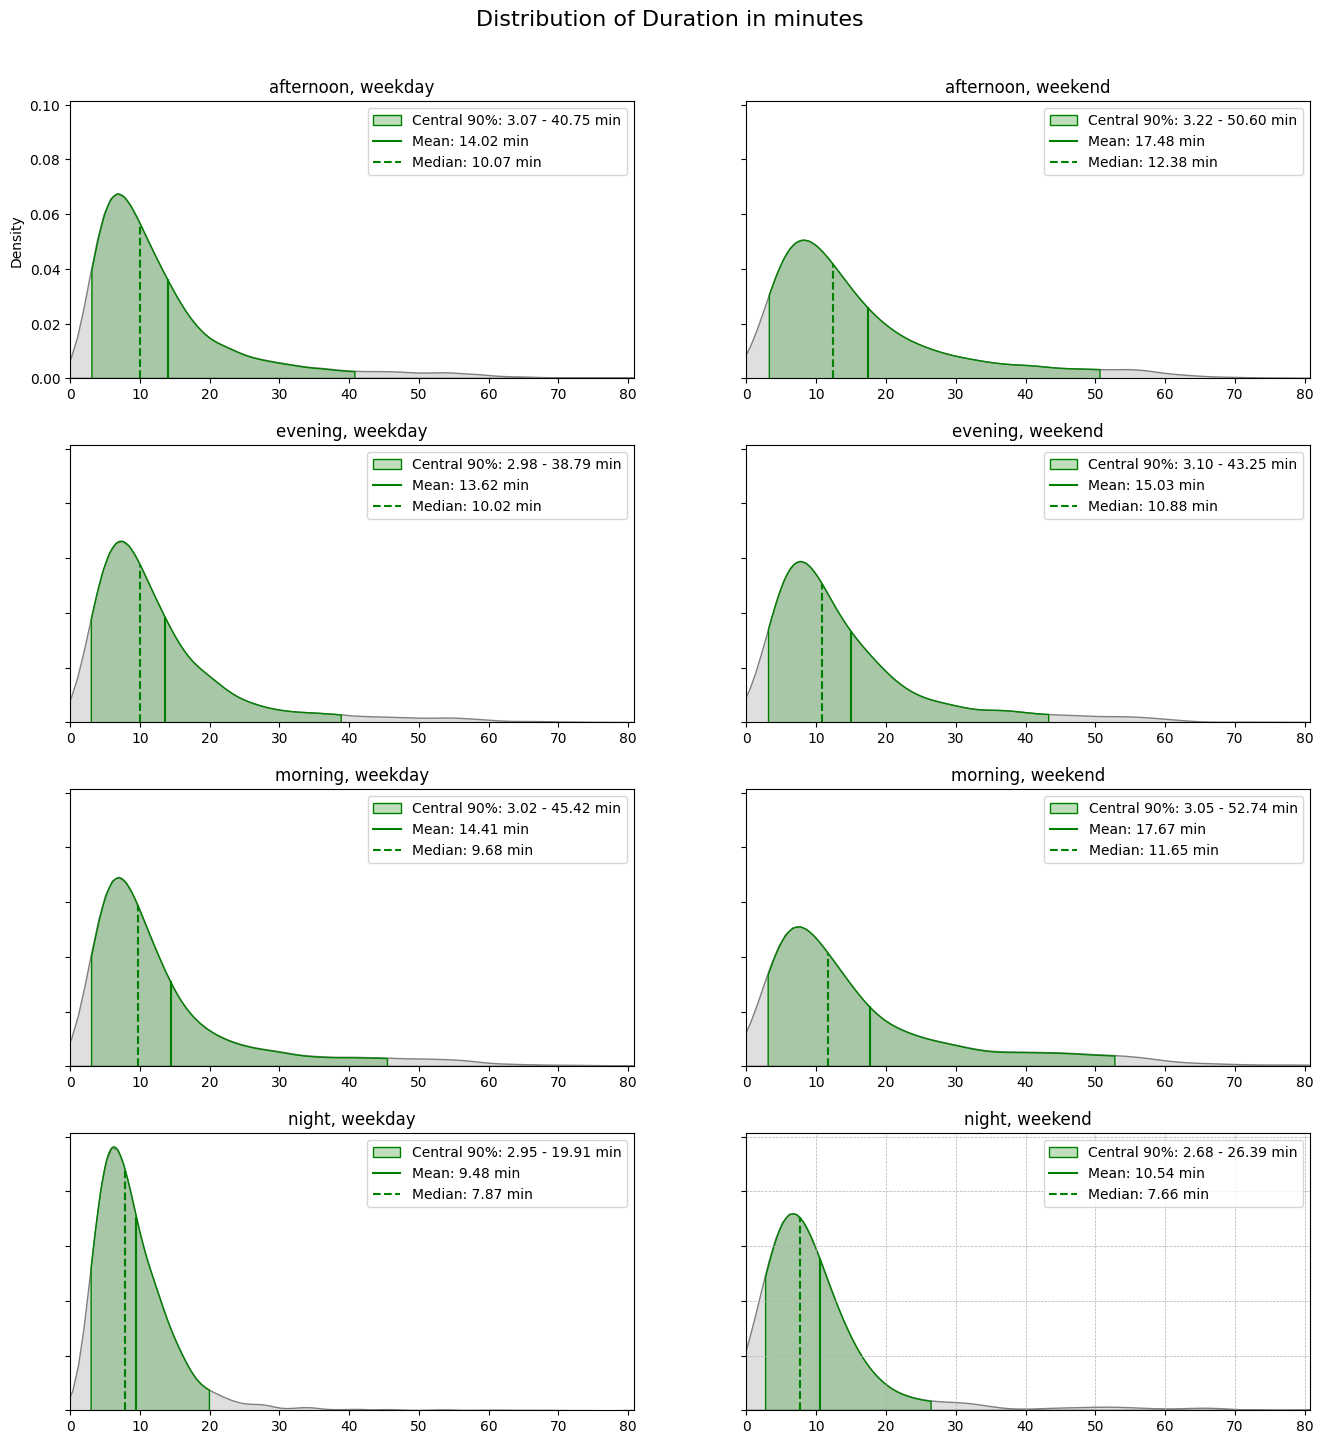

In [223]:
grouped = trips.groupby(["part_of_day", "part_of_week"]) 
kdeplots(grouped, "duration_in_minutes", unit="min")
plt.show()

In [224]:
means = grouped["duration"].mean()
print(means)

part_of_day  part_of_week
afternoon    weekday          841.186977
             weekend         1049.025567
evening      weekday          817.043079
             weekend          901.500420
morning      weekday          864.435644
             weekend         1060.263795
night        weekday          568.903814
             weekend          632.435294
Name: duration, dtype: float64
